In [1]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print("Frequency Table")

print("\n1. Absolute Frequencies:")
abs_freq = df['class'].value_counts().sort_index()
print(abs_freq)

print("\n2. Relative Frequencies (%):")
rel_freq = (df['class'].value_counts(normalize=True).sort_index() * 100).round(2)
print(rel_freq)

print("\n3. Cumulative Frequencies:")
cum_freq = df['class'].value_counts().sort_index().cumsum()
print(cum_freq)

frequency_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq,
    'Cumulative Frequency': cum_freq
})

print("\n4. Complete Frequency Table:")
print(frequency_table)

Frequency Table

1. Absolute Frequencies:
class
First     216
Second    184
Third     491
Name: count, dtype: int64

2. Relative Frequencies (%):
class
First     24.24
Second    20.65
Third     55.11
Name: proportion, dtype: float64

3. Cumulative Frequencies:
class
First     216
Second    400
Third     891
Name: count, dtype: int64

4. Complete Frequency Table:
        Absolute Frequency  Relative Frequency (%)  Cumulative Frequency
class                                                                   
First                  216                   24.24                   216
Second                 184                   20.65                   400
Third                  491                   55.11                   891


In [4]:
print("Contingency Table (sex vs survived):")

contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True, margins_name='Total')

contingency_table.columns = ['Survived = 0', 'Survived = 1', 'Total']

print(contingency_table)

Contingency Table (sex vs survived):
        Survived = 0  Survived = 1  Total
sex                                      
female            81           233    314
male             468           109    577
Total            549           342    891


In [5]:
print("Probability Calculations:")

total = contingency_table.loc['Total', 'Total']

print(f"1. Joint Probability:")
joint_female_survived = contingency_table.loc['female', 'Survived = 1']
p_joint = joint_female_survived / total
print(f"   P(Sex = female, Survived = 1) = {joint_female_survived}/{total} = {p_joint:.4f}")

print(f"\n2. Marginal Probabilities:")
female_total = contingency_table.loc['female', 'Total']
p_female = female_total / total
print(f"   P(Sex = female) = {female_total}/{total} = {p_female:.4f}")

survived_total = contingency_table.loc['Total', 'Survived = 1']
p_survived = survived_total / total
print(f"   P(Survived = 1) = {survived_total}/{total} = {p_survived:.4f}")

print(f"\n3. Conditional Probabilities:")
p_survived_given_female = joint_female_survived / female_total
print(f"   P(Survived = 1 | Sex = female) = {joint_female_survived}/{female_total} = {p_survived_given_female:.4f}")

p_female_given_survived = joint_female_survived / survived_total
print(f"   P(Sex = female | Survived = 1) = {joint_female_survived}/{survived_total} = {p_female_given_survived:.4f}")

Probability Calculations:
1. Joint Probability:
   P(Sex = female, Survived = 1) = 233/891 = 0.2615

2. Marginal Probabilities:
   P(Sex = female) = 314/891 = 0.3524
   P(Survived = 1) = 342/891 = 0.3838

3. Conditional Probabilities:
   P(Survived = 1 | Sex = female) = 233/314 = 0.7420
   P(Sex = female | Survived = 1) = 233/342 = 0.6813


Numerical Correlation
Missing values before cleaning:
Age: 177
Fare: 0

Dataset size after cleaning: 714 rows
Pearson correlation between age and fare: 0.0961


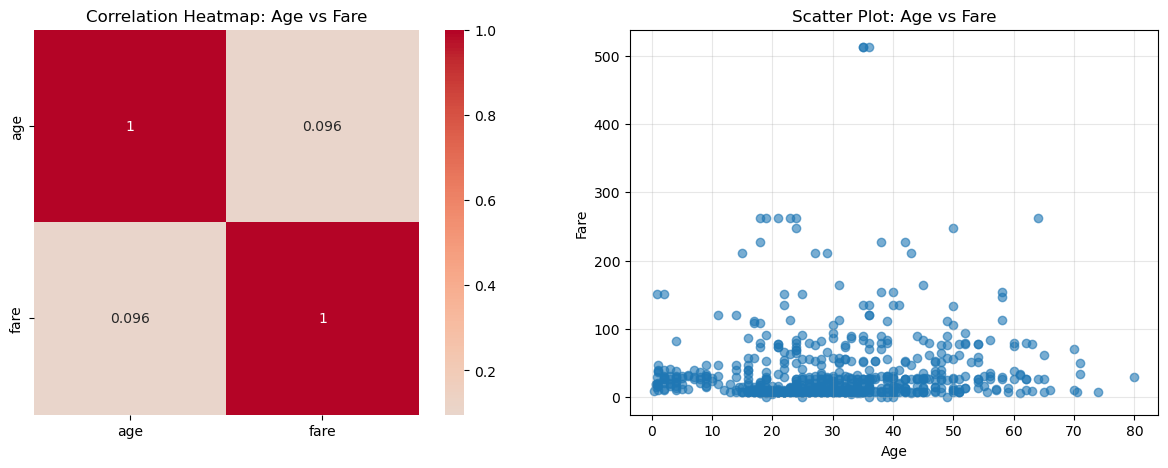


Summary Statistics:
Age - Mean: 29.70, Std: 14.53
Fare - Mean: 34.69, Std: 52.92


In [6]:
import matplotlib.pyplot as plt

print("Numerical Correlation")
print("Missing values before cleaning:")
print(f"Age: {df['age'].isnull().sum()}")
print(f"Fare: {df['fare'].isnull().sum()}")

df_clean = df[['age', 'fare']].dropna()
print(f"\nDataset size after cleaning: {len(df_clean)} rows")

correlation = df_clean['age'].corr(df_clean['fare'])
print(f"Pearson correlation between age and fare: {correlation:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

correlation_matrix = df_clean[['age', 'fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap: Age vs Fare')

axes[1].scatter(df_clean['age'], df_clean['fare'], alpha=0.6)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fare')
axes[1].set_title('Scatter Plot: Age vs Fare')
axes[1].grid(True, alpha=0.3)

plt.show()

print(f"\nSummary Statistics:")
print(f"Age - Mean: {df_clean['age'].mean():.2f}, Std: {df_clean['age'].std():.2f}")
print(f"Fare - Mean: {df_clean['fare'].mean():.2f}, Std: {df_clean['fare'].std():.2f}")

In [7]:
print("Correlation Interpretation")

print(f"Correlation coefficient: {correlation:.4f}")

if correlation > 0:
    direction = "positive"
    print(f"Direction: {direction} - As age increases, fare tends to increase")
elif correlation < 0:
    direction = "negative" 
    print(f"Direction: {direction} - As age increases, fare tends to decrease")
else:
    direction = "no linear"
    print(f"Direction: {direction} relationship")

abs_corr = abs(correlation)
if abs_corr >= 0.8:
    strength = "very strong"
elif abs_corr >= 0.6:
    strength = "strong"
elif abs_corr >= 0.4:
    strength = "moderate"
elif abs_corr >= 0.2:
    strength = "weak"
else:
    strength = "very weak"
print(f"Strength: {strength} correlation")

print(f"\nSign indication:")
if correlation > 0:
    print("Positive sign (+): Variables move in the same direction")
    print("- When one variable increases, the other tends to increase")
elif correlation < 0:
    print("Negative sign (-): Variables move in opposite directions")
    print("- When one variable increases, the other tends to decrease")

Correlation Interpretation
Correlation coefficient: 0.0961
Direction: positive - As age increases, fare tends to increase
Strength: very weak correlation

Sign indication:
Positive sign (+): Variables move in the same direction
- When one variable increases, the other tends to increase


Survival Analysis by Class
Contingency Table (Class vs Survived):
survived    0    1  All
class                  
First      80  136  216
Second     97   87  184
Third     372  119  491
All       549  342  891

Survival Rates by Class (%):
survived      0      1
class                 
First     37.04  62.96
Second    52.72  47.28
Third     75.76  24.24


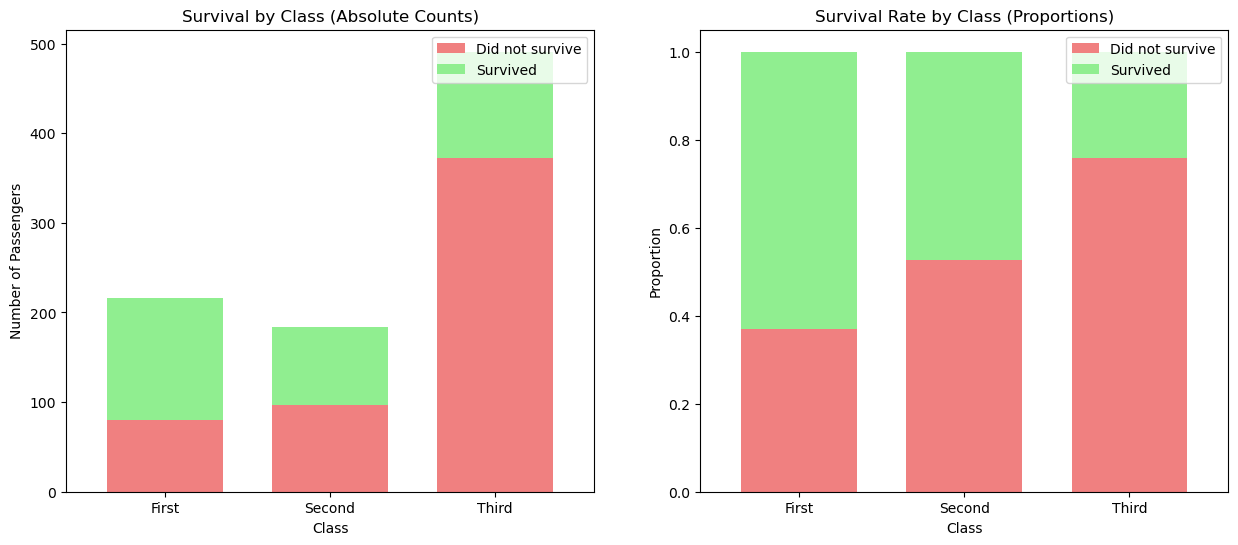


Analysis:
Survival rates by class:
First Class: 63.0%
Second Class: 47.3%
Third Class: 24.2%

Conclusion:
• First class had the highest survival rate at 63.0%
• There's a clear inverse relationship between class and survival:
  - Higher class passengers had better survival chances
  - This likely reflects proximity to lifeboats and evacuation priority


In [8]:
print("Survival Analysis by Class")

class_survival = pd.crosstab(df['class'], df['survived'], margins=True)
print("Contingency Table (Class vs Survived):")
print(class_survival)

survival_rates = pd.crosstab(df['class'], df['survived'], normalize='index') * 100
print(f"\nSurvival Rates by Class (%):")
print(survival_rates.round(2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

class_survival_data = pd.crosstab(df['class'], df['survived'])
class_survival_data.plot(kind='bar', stacked=True, ax=ax1, 
                        color=['lightcoral', 'lightgreen'], 
                        width=0.7)
ax1.set_title('Survival by Class (Absolute Counts)')
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Passengers')
ax1.legend(['Did not survive', 'Survived'], loc='upper right')
ax1.set_xticklabels(['First', 'Second', 'Third'], rotation=0)

survival_rates_plot = pd.crosstab(df['class'], df['survived'], normalize='index')
survival_rates_plot.plot(kind='bar', stacked=True, ax=ax2,
                         color=['lightcoral', 'lightgreen'],
                         width=0.7)
ax2.set_title('Survival Rate by Class (Proportions)')
ax2.set_xlabel('Class')
ax2.set_ylabel('Proportion')
ax2.legend(['Did not survive', 'Survived'], loc='upper right')
ax2.set_xticklabels(['First', 'Second', 'Third'], rotation=0)

plt.show()

print(f"\nAnalysis:")
print(f"Survival rates by class:")
for class_name in ['First', 'Second', 'Third']:
    rate = survival_rates.loc[class_name, 1]
    print(f"{class_name} Class: {rate:.1f}%")

highest_class = survival_rates[1].idxmax()
highest_rate = survival_rates.loc[highest_class, 1]

print(f"\nConclusion:")
print(f"• {highest_class} class had the highest survival rate at {highest_rate:.1f}%")
print(f"• There's a clear inverse relationship between class and survival:")
print(f"  - Higher class passengers had better survival chances")
print(f"  - This likely reflects proximity to lifeboats and evacuation priority")